In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import librosa
import librosa.display
from scipy.signal import lfilter


In [2]:
DATA_TRAIN = "C:\\Users\\s5pen\\YandexDisk\\ВКР\\crowd_train\\raw_crowd_train.tsv"
AUDIO_TRAIN = "C:\\Users\\s5pen\\YandexDisk\\ВКР\\crowd_train\\wavs\\"

DATA_TEST = "C:\\Users\\s5pen\\YandexDisk\\ВКР\\crowd_test\\raw_crowd_test.tsv"
AUDIO_TEST = "C:\\Users\\s5pen\\YandexDisk\\ВКР\\crowd_test\\wavs\\"


data_train = pd.read_csv(DATA_TRAIN, delimiter='\t')
data_train.tail()

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id
906948,dc1e379757b50ea57ba0d86fa2cfbc2e,wavs/dc1e379757b50ea57ba0d86fa2cfbc2e.wav,4.159625,sad,2.0,cff125aa5153b7677dd28377337dcd2f,индийские фильмы индийские,sad,037539580d1e28a834912088be1b81b0
906949,d923edeb05adcebc215d9ae9d9655a0a,wavs/d923edeb05adcebc215d9ae9d9655a0a.wav,3.784438,neutral,2.0,cff125aa5153b7677dd28377337dcd2f,сериал метро,sad,795e545977414fa4f915249f451d24f8
906950,b5dd4c4fd8f9e1f6f2b77041e0a69fe4,wavs/b5dd4c4fd8f9e1f6f2b77041e0a69fe4.wav,2.722938,neutral,2.0,6a059476b07f0467b9474fc47537784e,смотреть ужасы про крыс,sad,49fe520fd45da95b7c575e3db07846d2
906951,593277832bed252bf5f321223d5d08f4,wavs/593277832bed252bf5f321223d5d08f4.wav,3.349000,neutral,NaN,6a059476b07f0467b9474fc47537784e,мороженщик в реальной жизни,neutral,4de2287e6b082e4f652050eba71d21b2
906952,875a934947d3212d76afe782c4e2ca09,wavs/875a934947d3212d76afe782c4e2ca09.wav,3.320000,angry,4.0,6a059476b07f0467b9474fc47537784e,NaN,NaN,NaN


In [17]:
def create_countplot(data):
    plt.title('Count of emotions for train ', size=16)
    sns.countplot(x='annotator_emo', data=data)
    plt.ylabel('Count', size=12)
    plt.xlabel('Emotions', size=12)
    sns.despine(top=True, right=True, left=False, bottom=False)
    plt.show()

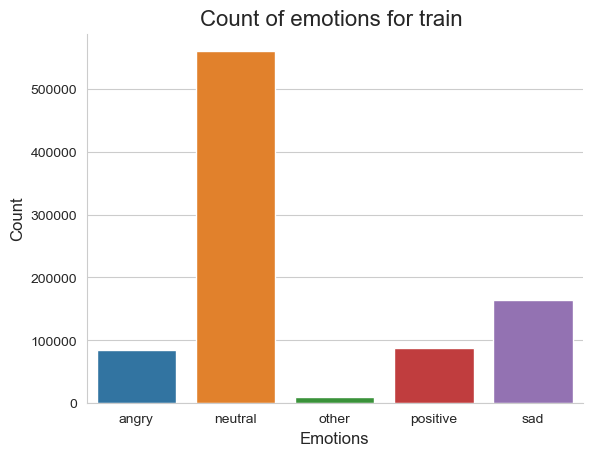

In [51]:
create_countplot(data_train)

In [5]:
data_test = pd.read_csv(DATA_TEST, delimiter='\t')
data_test.head()

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id
0,9e9961c53ca6eeb440b217e539fbf46c,wavs/9e9961c53ca6eeb440b217e539fbf46c.wav,5.82,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,я слушаю,neutral,4282ddc30d71ef420e202e0c60391e9f
1,0166f65a30354db8282682b1a280e64c,wavs/0166f65a30354db8282682b1a280e64c.wav,3.70,sad,NaN,858305a5450b7bd1288ba0053b1cd1c1,каким стал сбер,neutral,d70dc98ed56e9362eaefefb7b2827c8f
2,d49a6b560155831725a7bdc7d0a96099,wavs/d49a6b560155831725a7bdc7d0a96099.wav,4.38,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,где родился шерлок холмс,neutral,0ee35d2abecf4272ecc8e1539b0839d8
3,c6852b0925797612d7b6724da8cbe7b4,wavs/c6852b0925797612d7b6724da8cbe7b4.wav,8.58,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,открой в браузере ennio morricone,neutral,0855e363c1787df1592f58f7a27ebe13
4,0166f65a30354db8282682b1a280e64c,wavs/0166f65a30354db8282682b1a280e64c.wav,3.70,sad,NaN,a5562e26cd8f1949488a2d1e1e549d97,каким стал сбер,neutral,d70dc98ed56e9362eaefefb7b2827c8f


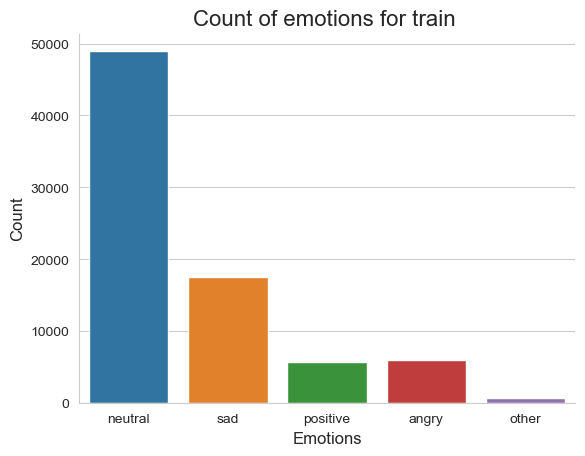

In [6]:
create_countplot(data_test)

In [7]:
def create_tsv_file_for_N_records(value: int):
    # Равное количество записей для каждой эмоции
    emotions = ['angry', 'neutral', 'sad', 'positive']
    records_per_emotion = value // len(emotions)

    # Пустой DataFrame для хранения выбранных записей
    selected_data = pd.DataFrame(columns=data_train.columns)

    # Выбор равного количества записей для каждой эмоции
    for emo in emotions:
        emo_data = data_train[(data_train['annotator_emo'] == emo) & (data_train['speaker_emo'] == emo)].head(records_per_emotion)
        selected_data = pd.concat([selected_data, emo_data])

    # Путь для сохранения нового файла
    raw_crowd_train = f"C:\\Users\\s5pen\\DataSpellProjects\\SER\\data_tcv\\raw_crowd_train_{value}.tsv"

    # Сохранение выбранных данных в новом TSV файле
    selected_data.to_csv(raw_crowd_train, sep='\t', index=False)


In [62]:
create_tsv_file_for_N_records(4)

In [12]:
def create_waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(emotion), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, emotion):
    # Преобразование аудиоданных в краткосрочное преобразование Фурье (STFT)
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(emotion), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

def create_mel_spectrogram(data, sr, emotion):
    mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
    plt.figure(figsize=(12, 3))
    plt.title('Mel Spectrogram for audio with {} emotion'.format(emotion), size=15)
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

def create_audio_display(data):
    display(Audio(data))

def create_mfcc_plot(data, sr, emotion):
    # Извлечение признаков MFCC
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)

    # Визуализация графика MFCC
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title('MFCC for audio with {} emotion'.format(emotion), size=15)
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    plt.tight_layout()
    plt.show()

def create_zcr_plot(data, sr, emotion):
    # Извлечение признаков Zero Crossing Rate (ZCR)
    zcr = librosa.feature.zero_crossing_rate(y=data)

    # Визуализация графика ZCR
    plt.figure(figsize=(8, 4))
    plt.plot(zcr[0], color='b')
    plt.title('Zero Crossing Rate for audio with {} emotion'.format(emotion), size=15)
    plt.xlabel('Frame')
    plt.ylabel('ZCR')
    plt.tight_layout()
    plt.show()

def create_lpc_plot(audio_signal,  emotion):
    lpc_coefficients = librosa.lpc(audio_signal, order=5)

    # Формирование коэффициентов фильтра
    filter_coefficients = np.hstack([[0], -1 * lpc_coefficients[1:]])

    # Применение фильтрации LPC к сигналу
    filtered_signal = lfilter(filter_coefficients, [1], audio_signal)

    # Построение графика исходного сигнала и предсказанного сигнала
    plt.figure(figsize=(10, 4))
    plt.plot(audio_signal, label='Исходный сигнал')
    plt.plot(filtered_signal, linestyle='--', label='Предсказанный сигнал')
    plt.title('Коэффициенты линейного предсказания для  {} эмоции'.format(emotion))
    plt.xlabel('Отсчет')
    plt.ylabel('Амплитуда')
    plt.legend()
    plt.show()

In [10]:
data_4 = pd.read_csv("C:\\Users\\s5pen\\DataSpellProjects\\SER\\data_tcv\\raw_crowd_train_4.tsv", delimiter='\t')
data_4

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id
0,475e76f77ac1ed7cabafca740b15b32a,wavs/475e76f77ac1ed7cabafca740b15b32a.wav,2.453,angry,NaN,858305a5450b7bd1288ba0053b1cd1c1,не надо не надо не надо не надо,angry,fa136da095807ea6cd18dd6e2f58d4d0
1,2f9438ef68395c70a8714dc373a49d11,wavs/2f9438ef68395c70a8714dc373a49d11.wav,4.640,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,фозил кори mp три,neutral,3d436884cbbe25373914f8768de494f7
2,fb44b08978c2254dca5c03b3f8b6f951,wavs/fb44b08978c2254dca5c03b3f8b6f951.wav,4.880,sad,NaN,858305a5450b7bd1288ba0053b1cd1c1,ну да плохое,sad,037af49d121127532aa7172f71b4ce19
3,ed5a0505897b5fd7fdd36e75e336e746,wavs/ed5a0505897b5fd7fdd36e75e336e746.wav,5.260,positive,NaN,858305a5450b7bd1288ba0053b1cd1c1,анекдот мне расскажешь,positive,a1863537906ea4335372883d6a9261f7


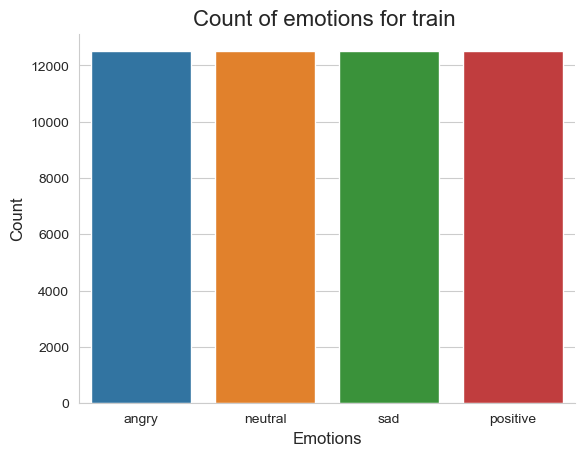

In [18]:
data_50_000_records = pd.read_csv("C:\\Users\\s5pen\\DataSpellProjects\\SER\\data_tcv\\raw_crowd_train_50000.tsv", delimiter='\t')
create_countplot(data_50_000_records)

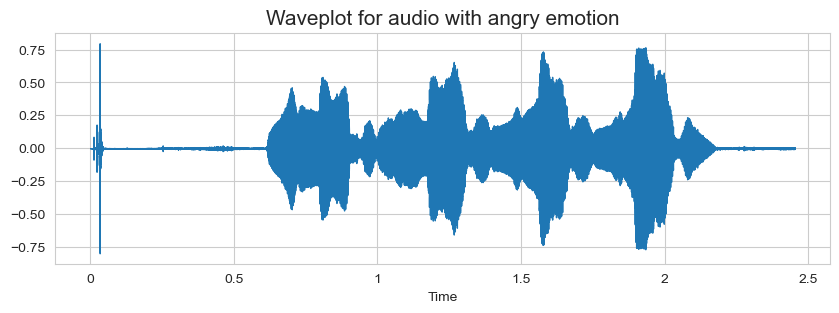

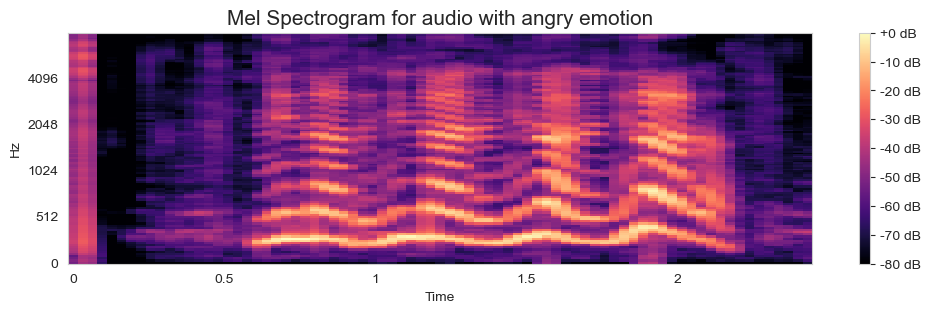

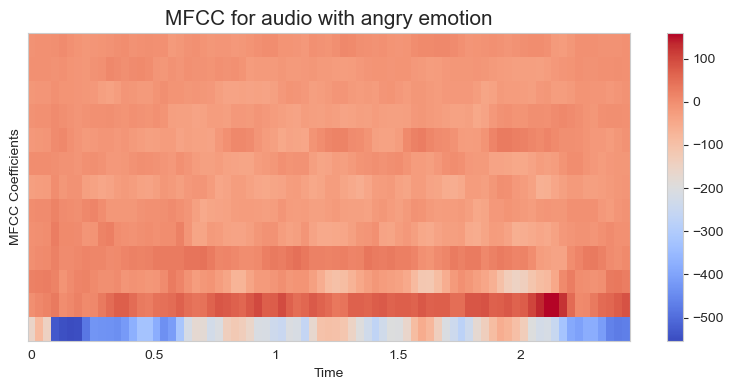

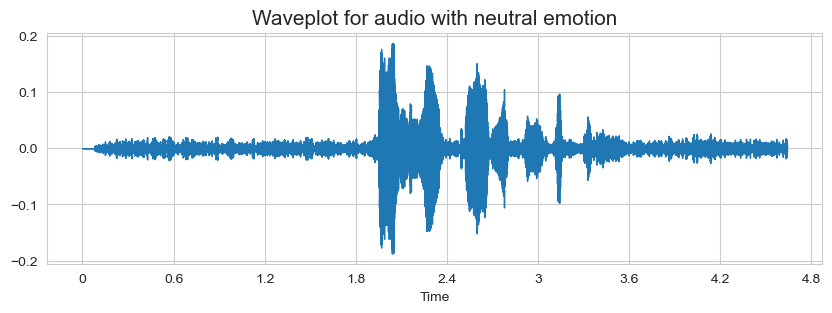

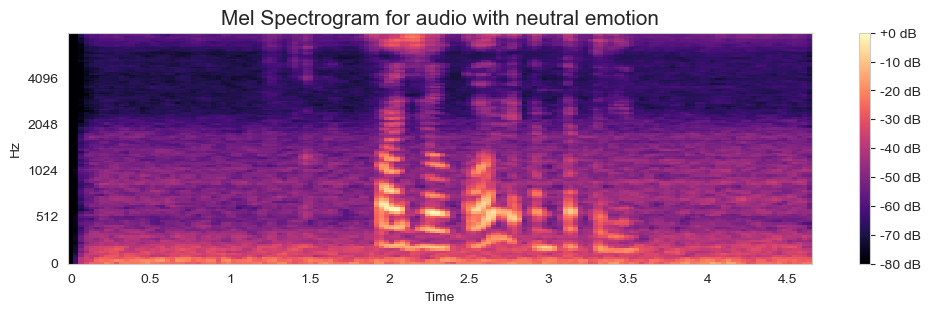

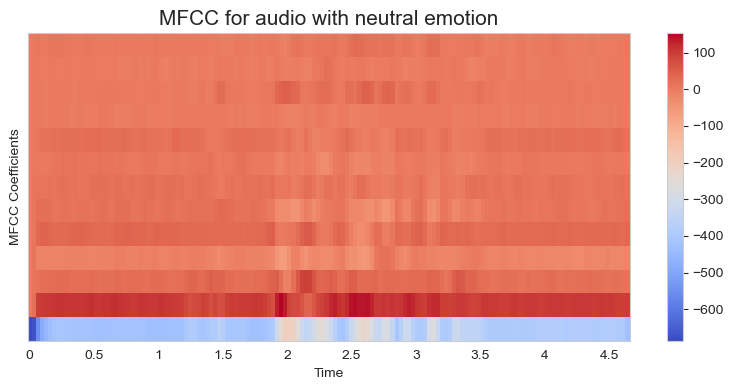

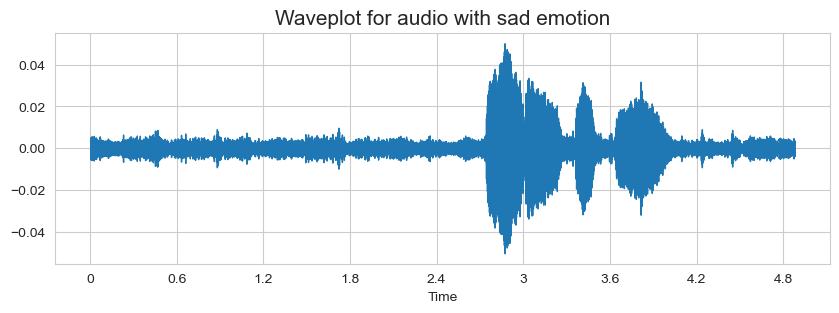

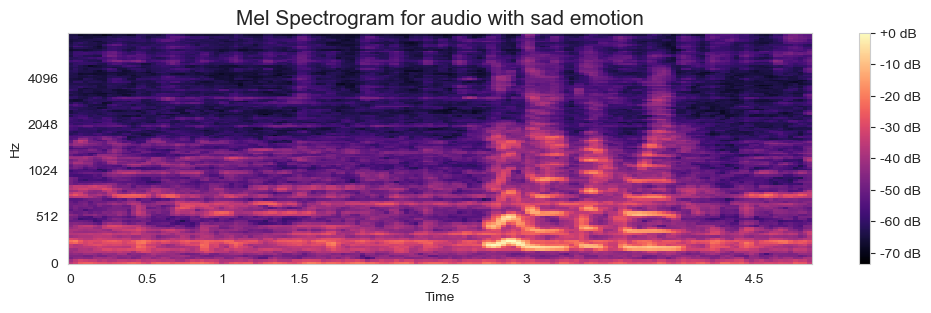

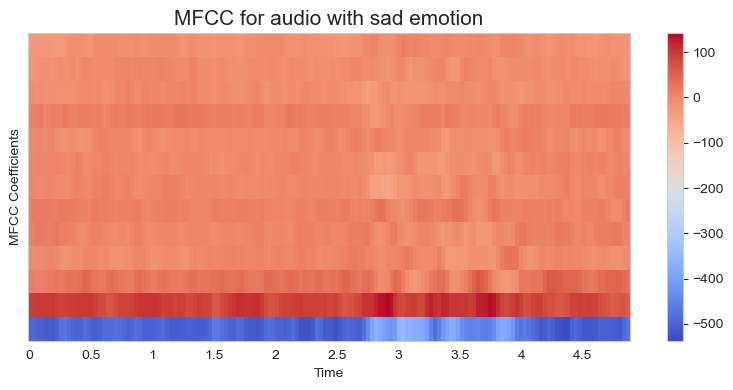

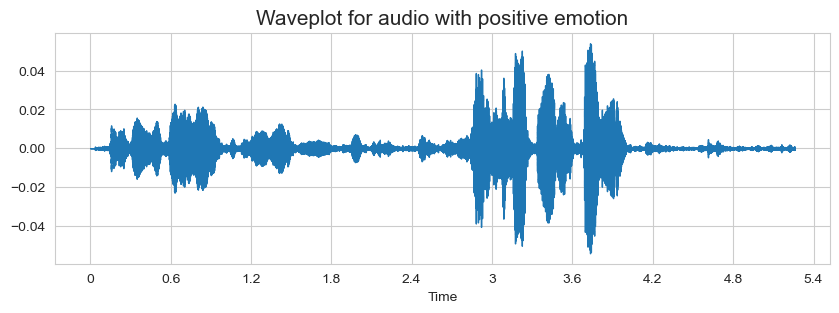

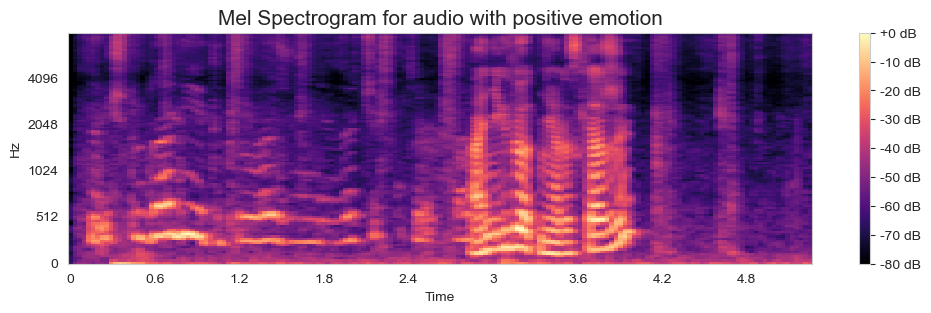

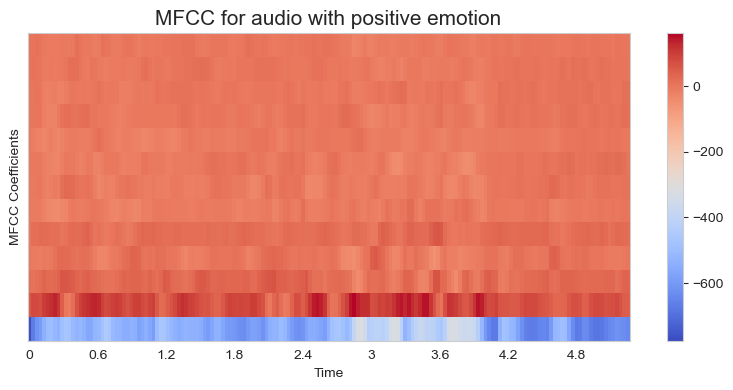

In [15]:
for index, row in data_4.iterrows():
    emotion = row['speaker_emo'] 
    audio_path = AUDIO_TRAIN + row['hash_id'] + ".wav"
    audio_data, sample_rate = librosa.load(audio_path, sr=None)
    create_audio_display(audio_path)
    create_waveplot(audio_data, sample_rate, emotion)
    create_mel_spectrogram(audio_data, sample_rate, emotion)
    # create_spectrogram(audio_data, sample_rate, emotion)
    create_mfcc_plot(audio_data, sample_rate, emotion)
    # create_zcr_plot(audio_data, sample_rate, emotion)
    # create_lpc_plot(audio_data, emotion)

# Извлечение признаков

In [63]:
# Извлечение признаков #EXPEREREMETN

def extract_zcr(data):
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    return zcr

def extract_mel_spectrogram(data, sample_rate):
    mel_spectrogram = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    return mel_spectrogram

def extract_mfcc(data, sample_rate):
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    return mfcc

def extract_chroma_stft(data, sample_rate):
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    return chroma_stft

def extract_features(data_path, emotions):
    X, Y = [], []
    for path, emotion in zip(data_path, emotions):
        data, sample_rate = librosa.load(path)

        zcr = extract_zcr(data)
        mel_spectrogram = extract_mel_spectrogram(data, sample_rate)
        mfcc = extract_mfcc(data, sample_rate)
        # chroma_stft = extract_chroma_stft(data, sample_rate)

        features = np.hstack((zcr, mel_spectrogram, mfcc))#, chroma_stft
        X.append(features)
        Y.append(emotion)

    return np.array(X), np.array(Y)

In [46]:
audio_path = AUDIO_TRAIN + data_100_records.hash_id + ".wav"
emotions = data_100_records.annotator_emo

X, Y = extract_features(audio_path, emotions)

[-2.60406219e+02  1.11038574e+02 -6.19479141e+01  3.19051247e+01
 -2.49627419e+01 -1.22187510e+01 -2.95872459e+01 -2.35838070e+01
 -1.46854267e+01 -1.01600580e+01 -1.70346718e+01 -2.32411766e+01
 -1.11213045e+01 -1.18840275e+01 -7.16996908e+00 -2.08973579e+01
 -6.44165564e+00 -9.39971256e+00 -1.04084663e+01 -1.85130715e+00
  7.19665527e-02  3.40986578e-03  2.28340854e-03  3.91184818e-03
  4.70318366e-03  3.03959404e-03  9.95162129e-03  1.31307989e-01
  3.00503016e+00  2.80548363e+01  7.28894653e+01  1.29272141e+02
  7.03954926e+01  2.12724953e+01  1.30329714e+01  1.60605583e+01
  2.05414696e+01  3.68440390e+00  5.86535263e+00  9.87966919e+00
  8.25585651e+00  1.37628479e+01  1.97221222e+01  1.42650576e+01
  8.02532673e+00  8.98232079e+00  1.68423576e+01  9.93848419e+00
  7.57999277e+00  8.75479698e+00  1.30191879e+01  2.16753006e+01
  1.61795044e+01  8.90588951e+00  5.03542805e+00  2.76055717e+00
  1.71069837e+00  1.27603936e+00  1.68437004e+00  1.72831762e+00
  7.67370582e-01  7.76680

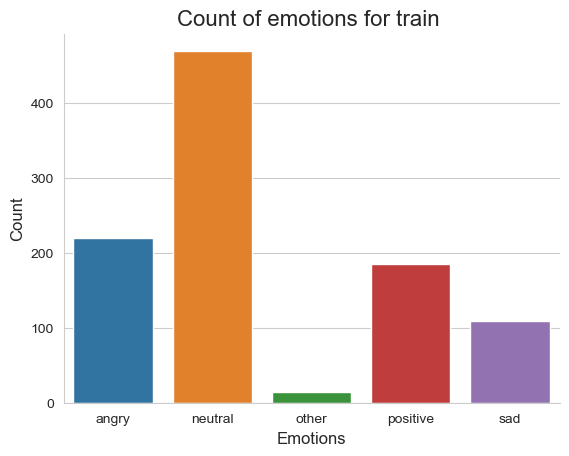

In [17]:
# Создание DataFrame
# columns = ["zcr_" + str(i) for i in range(X.shape[1] // 4)] + \
#           ["mel_spectrogram_" + str(i) for i in range(X.shape[1] // 4)] + \
#           ["mfcc_" + str(i) for i in range(X.shape[1] // 4)] + \
#           ["chroma_stft_" + str(i) for i in range(X.shape[1] // 4)]
# print(len(columns))

# Features = pd.DataFrame(X, columns=columns)
Features = pd.DataFrame(X)
Features['labels'] = Y
# Сохранение в CSV
Features.to_csv('C:\\Users\\s5pen\\DataSpellProjects\\SER\\features\\features_100.csv', index=False)

In [43]:
X, Y = [], []
audio_path = constants.AUDIO_TRAIN + first_1000_rows.hash_id + ".wav"
emotions = first_1000_rows.annotator_emo

for path, emotion in zip(audio_path , emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
   #     appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

KeyboardInterrupt: 

In [0]:
len(X), len(Y), audio_path.shape

In [31]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv(f'C:\\Users\\s5pen\\DataSpellProjects\\SER\\features\\features_{first_1000_rows}.csv', index=False)
Features.head()


,0,labels
0,-260.406219,angry
1,111.038574,angry
2,-61.947914,angry
3,31.905125,angry
4,-24.962742,angry


In [67]:
#Второй набор

first_10_000_rows = data_train.head(10000)
# create_countplot(first_10_000_rows)

X, Y = [], []
audio_path = AUDIO_TRAIN + first_10_000_rows.hash_id + ".wav"
emotions = first_10_000_rows.annotator_emo

for path, emotion in zip(audio_path , emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('C:\\Users\\s5pen\\DataSpellProjects\\SER\\features\\features_10000.csv', index=False)
Features.head()

KeyboardInterrupt: 

In [ ]:
create_countplot(first_10_000_rows)


### Подготовка данных

In [68]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [69]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [70]:
from sklearn.model_selection import train_test_split

# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1117500, 1), (1117500, 5), (372500, 1), (372500, 5))

In [71]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1117500, 1), (1117500, 5), (372500, 1), (372500, 5))